In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing The Required Librares**

In [2]:
import numpy as np
import random
import string
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
f = open("dialogs.txt","r",errors = 'ignore')
raw_doc = f.read()
raw_doc = raw_doc.lower()

In [4]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
sent_token = nltk.sent_tokenize(raw_doc)
word_token = nltk.word_tokenize(raw_doc)
print(f"Number of sentence : {len(sent_token)}")
print(f"Number of Words in : {len(word_token)}")

Number of sentence : 8272
Number of Words in : 60702


# **Text Preprocessing**

In [6]:
lemmer = nltk.stem.WordNetLemmatizer()
remove_punct_dict = {ord(punct):None for punct in string.punctuation}
def lem_token(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def lem_normalize(text):
    return lem_token(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# **Defining The Greeting Function**

In [7]:
GREET_INPUT = ("hello,hi,sup")
GREET_RESPONSE = ['Hi',"Hello","I am glad you are talking to me!"]

def greet(sentence):
    for word in sentence.split():
        if word.lower() in GREET_INPUT:
            return random.choice(GREET_RESPONSE)

# **Response Generation**

**TF-IDF Formula**


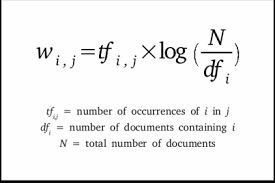

In [8]:
def response(user_response):
    sent_token.append(user_response)
    tfidfvec = TfidfVectorizer(tokenizer = lem_normalize,stop_words = 'english')
    tfidf = tfidfvec.fit_transform(sent_token)
    vals = cosine_similarity(tfidf[-1],tfidf)
    idx = vals.argsort()[0][-2]
    
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    sent_token.remove(user_response)
    if (req_tfidf == 0):
        return " I am Sorry! I dont understand you"
    else:
        return str(sent_token[idx])


# **Testing**

In [1]:
flag = True
print("BOT : My Name is BOT, Let's Have Conversation! If you want to exit any time, just type Bye! ")

print("\n")
while (flag==True):
    user_response = input("You : ")
    if (user_response != "bye"):
        if (user_response == 'thanks'):
            flag = False
            print("BOT : You are welcome..")
        else:
            if (greet(user_response) != None):
                print("BOT :" +"\t"+greet(user_response))
            else:
                print("BOT L",end = "")
                print(response(user_response))
        print("\n")
                
    else:
        flag = False
        print("BOT : Goodbye! Take Care")

BOT : My Name is BOT, Let's Have Conversation! If you want to exit any time, just type Bye! 


